### OCT 2022: END SEMESTER ASSESSMENT (ESA)
## M TECH DATA SCIENCE AND MACHINE LEARNING_ SEMESTER I
### UE20CS902 – Statistical Methods for Decision Making
  

In [1]:
# import 'pandas'
import pandas as pd

# import 'numpy'
import numpy as np

# import subpackage of matplotlib
import matplotlib.pyplot as plt

# import 'seaborn'
import seaborn as sns

# to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

# import statsmodels
import statsmodels.api as sm

# import 'stats' package from scipy library
import scipy.stats as stats

# import statistics to perform statistical computations
import statistics

# to test the normality
from scipy.stats import shapiro

# import a library to perform Z-test
from statsmodels.stats import weightstats as stests

# import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

### 3a) Fifteen adult males between the ages of 35 and 50 participated in a study to evaluate the effect of diet and exercise on blood cholesterol levels. The total cholesterol was measured in each subject initially and then three months after participating in an aerobic exercise program and switching to a low-fat diet. The data  is provided  in BC.csv file. Do the data support the claim that low-fat diet and aerobic exercise are of value in producing a mean reduction in blood cholesterol levels? Use alpha =. 0.05. Find the P-value
- i. State the null hypothesis and the alternate hypothesis. (1 mark)

- ii. Which test is to be performed. (1 mark)
- iii. Compute test statistics, p value. (3 marks)
- iv. At the 0.05 significance level, can we conclude whether program has helpedreduction in cholesterol levels ? (1 mark)


In [2]:
df = pd.read_csv('BC.csv')
df.head()

,subject,Before,After
0,1,265,229
1,2,240,231
2,3,258,227
3,4,295,240
4,5,251,238


### i. State the null hypothesis and the alternate hypothesis (1 mark)
- Null Hypothesis (H₀): There is no mean reduction in blood cholesterol levels after participating in the aerobic exercise program and switching to a low-fat diet.

- Alternate Hypothesis (H₁): There is a mean reduction in blood cholesterol levels after participating in the aerobic exercise program and switching to a low-fat diet.

### ii. Which test is to be performed (1 mark)
We will perform a paired t-test because we are comparing the cholesterol levels of the same subjects before and after the intervention.

In [4]:
# Extract the initial and final cholesterol levels
initial_cholesterol = df['Before']
final_cholesterol = df['After']

# Perform paired t-test
t_stat, p_value = stats.ttest_rel(initial_cholesterol, final_cholesterol)

print(f'Paired t-test: t-statistic={t_stat:.4f}, p-value={p_value:.4f}')

Paired t-test: t-statistic=5.4659, p-value=0.0001


**p-value is less than 0.05**, we reject the null hypothesis and conclude that the program has helped reduce cholesterol levels.

#### 3b) The compressive strength of samples of cement can be modeled by a normal distribution with a mean of 6000 kilograms per square centimeter and a standard deviation of 100 kilograms per square centimeter.

- i. What is the probability that a sample’s strength is less than 6250 Kg/cm2 ( 2mark)
- ii. What is the probability that a sample’s strength is between 5800 and 5900 Kg/cm2(2 mark)
- iii. What strength is exceeded by 95% of the samples (2 mark)k


In [5]:
# Given parameters
mean = 6000
std_dev = 100

# Calculate the probability
probability_less_than_6250 = stats.norm.cdf(6250, mean, std_dev)
print(f'Probability that a sample’s strength is less than 6250 Kg/cm²: {probability_less_than_6250:.4f}')

Probability that a sample’s strength is less than 6250 Kg/cm²: 0.9938


In [6]:
# Calculate the probabilities
probability_less_than_5800 = stats.norm.cdf(5800, mean, std_dev)
probability_less_than_5900 = stats.norm.cdf(5900, mean, std_dev)

# Calculate the probability between 5800 and 5900
probability_between_5800_and_5900 = probability_less_than_5900 - probability_less_than_5800
print(f'Probability that a sample’s strength is between 5800 and 5900 Kg/cm²: {probability_between_5800_and_5900:.4f}')


Probability that a sample’s strength is between 5800 and 5900 Kg/cm²: 0.1359


In [7]:
# Calculate the strength exceeded by 95% of the samples
strength_exceeded_by_95_percent = stats.norm.ppf(0.05, mean, std_dev)
print(f'Strength exceeded by 95% of the samples: {strength_exceeded_by_95_percent:.4f} Kg/cm²')


Strength exceeded by 95% of the samples: 5835.5146 Kg/cm²


#### 3c) An experiment in which shape measurement was determined for several different nozzle types. Interest in this experiment focuses primarily on nozzle type and to determine whether there is difference across various nozzle types in terms of shape.

```
Nozzle
1	0.78	0.8	    0.81	0.75	0.77	0.78
2	0.85	0.85	0.92	0.86	0.81	0.83
3	0.93	0.92	0.95	0.89	0.89	0.83
4	1.14	0.97	0.98	0.88	0.86	0.83
5	0.97	0.86	0.78	0.76	0.76	0.75

```
- i)	State the hypothesis and the test to be conducted    1
- ii)	Does nozzle type affect shape measurement use a p value 3
- iii) Based on the mean value for each Nozzle type which would you say can play a siginifcant difference 2 mark


F-statistic: 5.314493758668515
p-value: 0.0030786564921346997
Nozzle type significantly affects shape measurement.
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2   0.0717  0.401 -0.0459  0.1892  False
     1      3     0.12 0.0438  0.0024  0.2376   True
     1      4   0.1617 0.0037  0.0441  0.2792   True
     1      5   0.0317 0.9308 -0.0859  0.1492  False
     2      3   0.0483 0.7471 -0.0692  0.1659  False
     2      4     0.09 0.1953 -0.0276  0.2076  False
     2      5    -0.04 0.8532 -0.1576  0.0776  False
     3      4   0.0417  0.834 -0.0759  0.1592  False
     3      5  -0.0883   0.21 -0.2059  0.0292  False
     4      5    -0.13  0.025 -0.2476 -0.0124   True
----------------------------------------------------


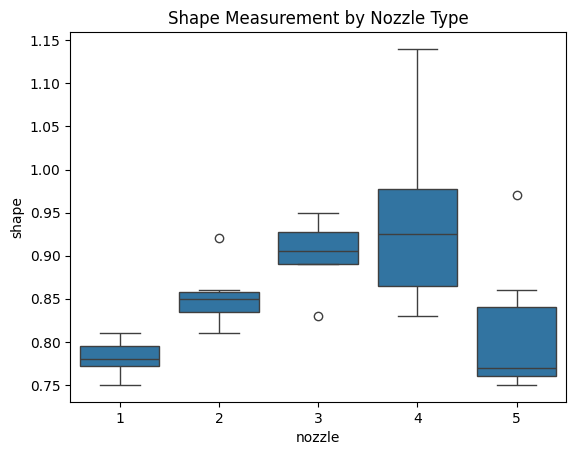

In [13]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
data = {
    'nozzle': [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5],
    'shape': [0.78, 0.8, 0.81, 0.75, 0.77, 0.78, 0.85, 0.85, 0.92, 0.86, 0.81, 0.83, 0.93, 0.92, 0.95, 0.89, 0.89, 0.83, 1.14, 0.97, 0.98, 0.88, 0.86, 0.83, 0.97, 0.86, 0.78, 0.76, 0.76, 0.75]
}



# Create a DataFrame
df = pd.DataFrame(data)

# (i) Hypothesis and Test
#   Null hypothesis: There is no difference in shape measurement across nozzle types.
#   Alternative hypothesis: There is a difference in shape measurement across nozzle types.
#   Test: One-way ANOVA

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(df['shape'][df['nozzle'] == 1],
                                   df['shape'][df['nozzle'] == 2],
                                   df['shape'][df['nozzle'] == 3],
                                   df['shape'][df['nozzle'] == 4],
                                   df['shape'][df['nozzle'] == 5])

print("F-statistic:", f_statistic)
print("p-value:", p_value)

# (ii) Does nozzle type affect shape measurement?
if p_value < 0.05:
    print("Nozzle type significantly affects shape measurement.")
else:
    print("Nozzle type does not significantly affect shape measurement.")

# (iii) Significant differences between nozzle types
#   Use Tukey's HSD test for pairwise comparisons
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_results = pairwise_tukeyhsd(df['shape'], df['nozzle'])
print(tukey_results)

# Visualize the data
sns.boxplot(x='nozzle', y='shape', data=df)
plt.title('Shape Measurement by Nozzle Type')
plt.show()

In [14]:
df.head()

,nozzle,shape
0,1,0.78
1,1,0.80
2,1,0.81
3,1,0.75
4,1,0.77


#### 3d) Two catalysts are being analyzed to determine how they affect the mean yield of a chemical process. Specifically, catalysts 1 is currently in use, but catalyst 2 is acceptable. Since catalyst is cheaper, it should be adopted, providing it does not change the process yield. A test is run in the pilot plant and results in the data shown table. Is there any difference in mean yields for an α =.05 and assume equal variances

```
Number	     1	     2	   3	   4	    5	    6	    7	   8
Catlayst1	91.50	94.18	92.18	95.39	91.79	89.07	94.72   89.21
Catalyst2	89.19	90.95	90.46	93.21	97.19	97.04	91.07   92.75

```

- i)	State the hypothesis and type of test to be used                    2 marks
- ii)	Test the hypothesis and conclude                                    4 marks

### i) Hypothesis and Test

- **Null Hypothesis (H₀)**: There is no significant difference in the mean yield between Catalyst 1 and Catalyst 2.

- **Alternative Hypothesis (H₁)**: There is a significant difference in the mean yield between Catalyst 1 and Catalyst 2.

Test: Two-sample t-test (assuming equal variances)

In [15]:
import pandas as pd
import scipy.stats as stats

# Sample data (replace with your actual data)
data = {
    'Catalyst': ['Catalyst1', 'Catalyst1', 'Catalyst1', 'Catalyst1', 'Catalyst1', 'Catalyst1', 'Catalyst1', 'Catalyst1',
                 'Catalyst2', 'Catalyst2', 'Catalyst2', 'Catalyst2', 'Catalyst2', 'Catalyst2', 'Catalyst2', 'Catalyst2'],
    'Yield': [91.50, 94.18, 92.18, 95.39, 91.79, 89.07, 94.72, 89.21,
              89.19, 90.95, 90.46, 93.21, 97.19, 97.04, 91.07, 92.75]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Perform two-sample t-test
t_statistic, p_value = stats.ttest_ind(df['Yield'][df['Catalyst'] == 'Catalyst1'],
                                     df['Yield'][df['Catalyst'] == 'Catalyst2'],
                                     equal_var=True)

print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Set significance level (alpha)
alpha = 0.05

# Compare p-value with alpha
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean yields between the two catalysts.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in mean yields between the two catalysts.")

t-statistic: -0.35359086434617987
p-value: 0.7289136186068217
Fail to reject the null hypothesis. There is no significant difference in mean yields between the two catalysts.


#### 3e) The amount of water consumed each day by a healthy adult follows a normal distribution with a mean of 1.52 liters, standard deviation of .18. A sample of 40 adults water consumption in liters is taken and it has a mean of 1.76 liters.Test whether any increase in the consumption of water?

- (i) State the null hypothesis and the alternate hypothesis. (1 mark)
- (ii) Which test is to be performed. (1 mark)
- (iii) Compute test statistics, pvalue. (3 marks)
- (iv) At the 0.05 significance level, can we conclude that water consumption has increased? (1 mark)


#### i) State the null hypothesis and the alternate hypothesis (1 mark)
- **Null Hypothesis (H₀)**: There is no increase in the mean water consumption of healthy adults.

- **Alternate Hypothesis (H₁)**: There is an increase in the mean water consumption of healthy adults.

#### ii) Which test is to be performed (1 mark)
We will perform a one-sample t-test to compare the sample mean to the population mean.

In [16]:
# Given parameters
population_mean = 1.52
sample_mean = 1.76
std_dev = 0.18
sample_size = 40

# Calculate the standard error
standard_error = std_dev / (sample_size ** 0.5)

# Perform one-sample t-test
t_stat = (sample_mean - population_mean) / standard_error
p_value = stats.t.sf(t_stat, df=sample_size-1)  # One-tailed test

print(f'One-sample t-test: t-statistic={t_stat:.4f}, p-value={p_value:.4f}')

One-sample t-test: t-statistic=8.4327, p-value=0.0000


In [17]:

# Given data
mu = 1.52
sigma = 0.18
n = 40
x_bar = 1.76
alpha = 0.05

# Calculate the test statistic
z = (x_bar - mu) / (sigma / n**0.5)

# Calculate the p-value
p_value = stats.norm.sf(z)

print("Z-statistic:", z)
print("P-value:", p_value)

# Compare p-value with alpha
if p_value < alpha:
    print("Reject the null hypothesis. There is strong evidence that the mean water consumption has increased.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to conclude that the mean water consumption has increased.")

Z-statistic: 8.432740427115679
P-value: 1.6883155939436834e-17
Reject the null hypothesis. There is strong evidence that the mean water consumption has increased.


### 4a) Consider the purchases.csv file and answer the following questions


In [20]:
df = pd.read_csv('purchase.csv')
# display first five observations using head()
df.head()

,Products,Prod_id,Cust_id,Sales,Order_Quan,Profit,Shipping_Cost,Product_Base_Margin,Customer_Segment
0,COPIERS AND FAX,Prod_16,Cust_1088,10909.641,40,2616.46,22.00,0.57,HOME OFFICE
1,COPIERS AND FAX,Prod_16,Cust_1820,10607.641,27,2977.36,23.69,0.56,CORPORATE
2,PAPER,Prod_6,Cust_1659,754.641,13,29.80,8.90,0.37,SMALL BUSINESS
3,PAPER,Prod_6,Cust_622,572.641,22,92.78,10.99,0.39,SMALL BUSINESS
4,OFFICE MACHINES,Prod_17,Cust_564,10128.641,50,5133.68,20.50,0.36,SMALL BUSINESS


### 4a.i)Provide a summary statistics of all the variables, with respect to sales which variables have high correlation (more than .55), moderate (.4-.55) and low correlation. - 3marks



In [29]:
# Summary statistics
summary_stats = df.describe()
print(summary_stats)

# Correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

# Correlation with sales
correlation_with_sales = correlation_matrix['sales']
print(correlation_with_sales)

              Sales   Order_Quan        Profit  Shipping_Cost  \
count   5977.000000  5977.000000   5977.000000    5977.000000   
mean    5269.333126    27.657019   1148.646120      15.181052   
std     7461.093502    14.373769   2701.386493      15.420363   
min        3.420000     1.000000 -14140.700000       0.490000   
25%      151.750000    16.000000    -35.980000       4.750000   
50%     1311.680000    28.000000     40.320000      10.290000   
75%     8315.641000    40.000000   2509.810000      21.990000   
max    45923.760000    58.000000  14440.390000     164.730000   

       Product_Base_Margin  
count          5977.000000  
mean              0.493346  
std               0.165827  
min               0.350000  
25%               0.370000  
50%               0.400000  
75%               0.580000  
max               6.980000  


ValueError: could not convert string to float: 'COPIERS AND FAX'

### 4a.ii)Provide a histogram for the variable sales and profit, based on histogram and cacluation of skewness and kurtosis what would you describe about sales and profit. 4 marks



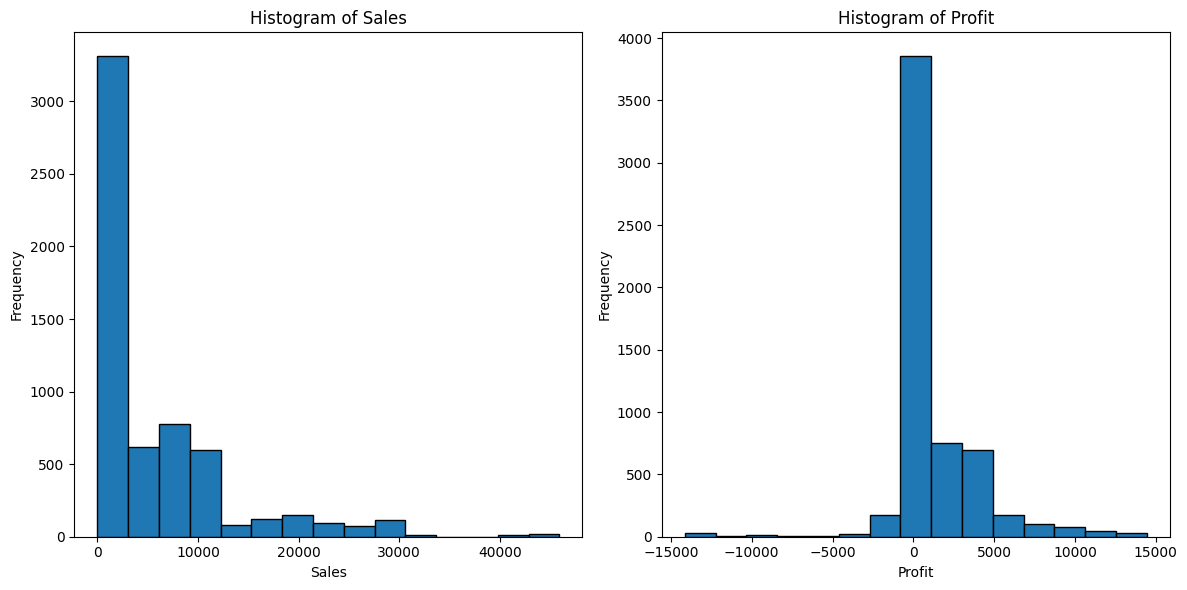

Sales Skewness: 2.0320
Sales Kurtosis: 4.8308
Profit Skewness: 0.7687
Profit Kurtosis: 7.6054


In [23]:

# Plot histograms
plt.figure(figsize=(12, 6))

# Histogram for Sales
plt.subplot(1, 2, 1)
plt.hist(df['Sales'], bins=15, edgecolor='black')
plt.title('Histogram of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')

# Histogram for Profit
plt.subplot(1, 2, 2)
plt.hist(df['Profit'], bins=15, edgecolor='black')
plt.title('Histogram of Profit')
plt.xlabel('Profit')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Calculate skewness and kurtosis
sales_skewness = stats.skew(df['Sales'])
sales_kurtosis = stats.kurtosis(df['Sales'])
profit_skewness = stats.skew(df['Profit'])
profit_kurtosis = stats.kurtosis(df['Profit'])

print(f'Sales Skewness: {sales_skewness:.4f}')
print(f'Sales Kurtosis: {sales_kurtosis:.4f}')
print(f'Profit Skewness: {profit_skewness:.4f}')
print(f'Profit Kurtosis: {profit_kurtosis:.4f}')


### 4a.iii) Plot the plot the histogram for variable sales, profit based on customer segements,  based on these plots which segment provides more sales, profit and less sales, profit (assume bins  = 15) 4 marks



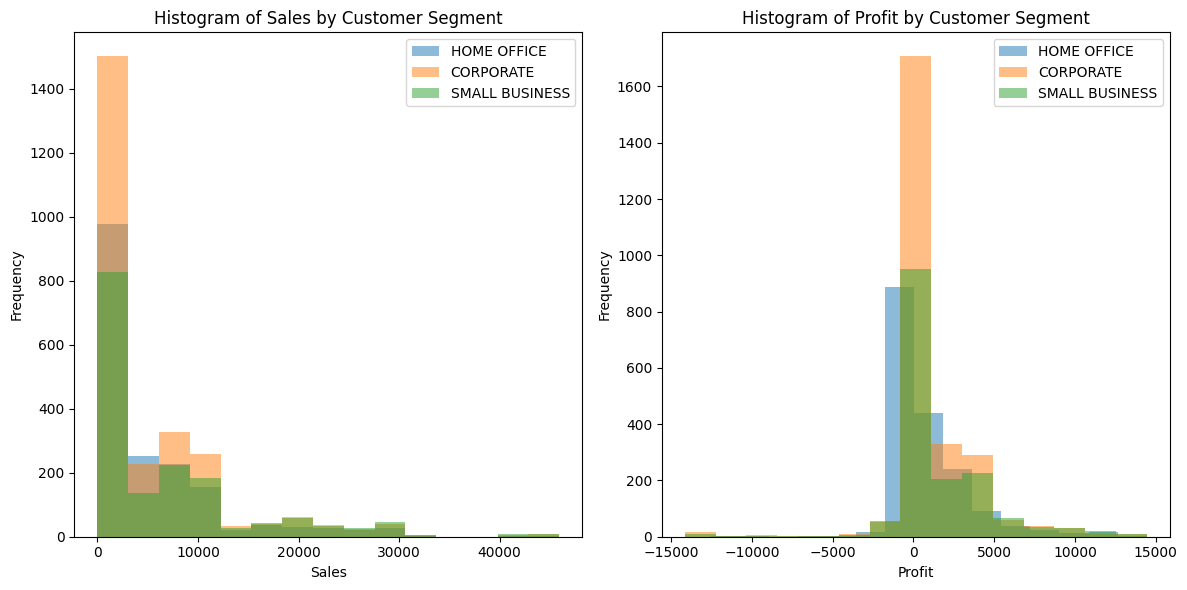

In [26]:
# Histogram for Sales
# Plot histograms for Sales based on Customer Segments
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for segment in df['Customer_Segment'].unique():
    plt.hist(df[df['Customer_Segment'] == segment]['Sales'], bins=15, alpha=0.5, label=segment)
plt.title('Histogram of Sales by Customer Segment')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.legend()

# Histogram for Profit
plt.subplot(1, 2, 2)
for segment in df['Customer_Segment'].unique():
    plt.hist(df[df['Customer_Segment'] == segment]['Profit'], bins=15, alpha=0.5, label=segment)
plt.title('Histogram of Profit by Customer Segment')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

### 4a.iv) Draw a scatter plot for all of the variables, what is your observation and conclusion for the relationship between sales and  the other numeric variables 4 marks


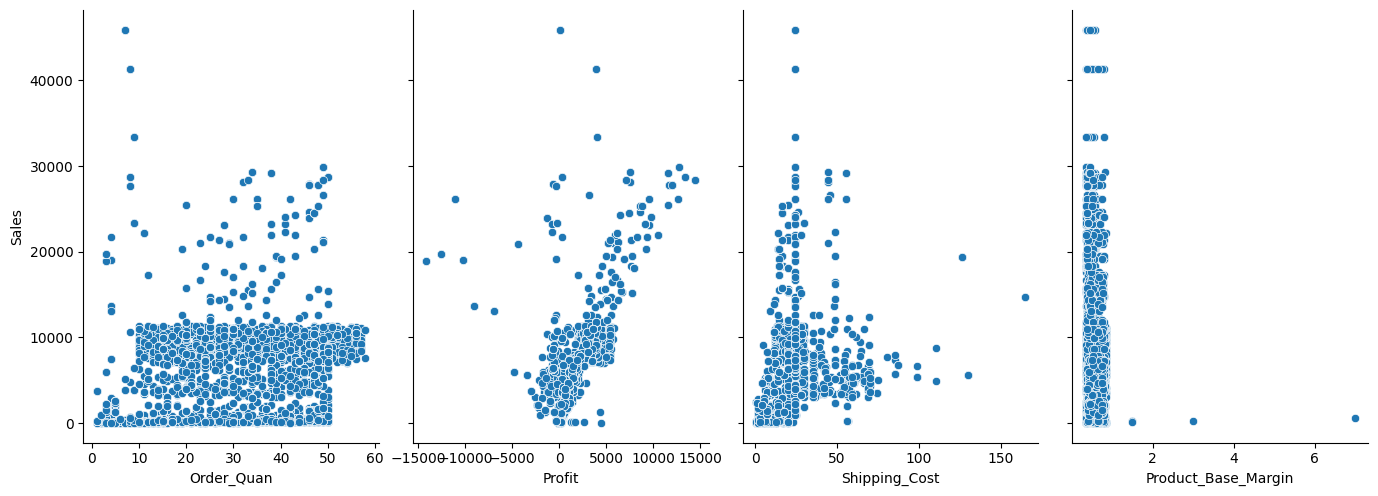

In [30]:
# Plot scatter plots for all variables against sales
sns.pairplot(df, x_vars=["Order_Quan", "Profit", "Shipping_Cost", "Product_Base_Margin"], y_vars='Sales', height=5, aspect=0.7)
plt.show()

### 4b. Consider the purchases.csv file and answer the following questions

### 4b.i)Draw a boxplot for sales based on customer segments, what do you observe in terms of outliers, and sales difference for various segments. 3


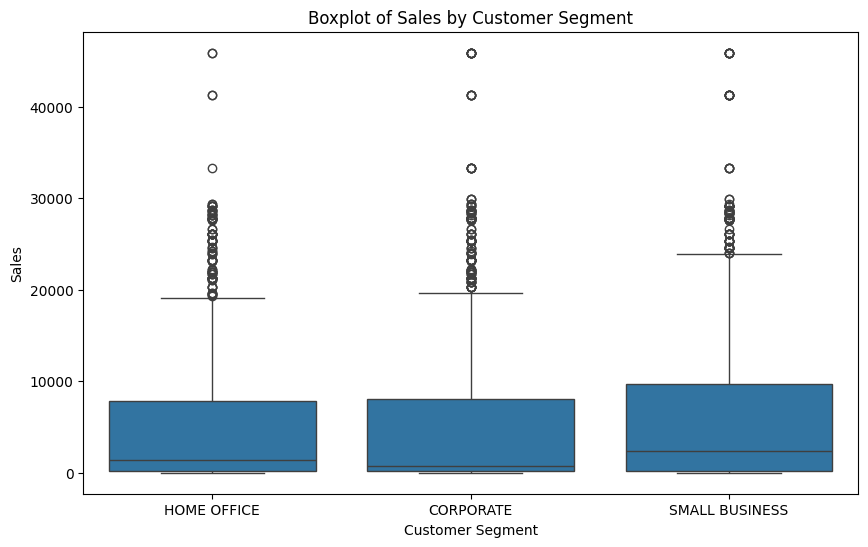

In [31]:
# Draw a boxplot for sales based on customer segments
plt.figure(figsize=(10, 6))
sns.boxplot(x='Customer_Segment', y='Sales', data=df)
plt.title('Boxplot of Sales by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Sales')
plt.show()

### 4b.ii)Conduct a hypothesis to see whether there is a difference in terms of sales for customer segment of home business and corporate. What do you conclude 4 - marks


#### i) State the hypothesis and type of test to be used
Hypothesis:

- Null Hypothesis (H₀): There is no difference in sales between the home business and corporate customer segments.

- Alternative Hypothesis (H₁): There is a difference in sales between the home business and corporate customer segments.

**Test**: We will perform a two-sample t-test to compare the mean sales of the two customer segments.

In [34]:
# Extract sales for home business and corporate customer segments
home_business_sales = df[df['Customer_Segment'] == 'HOME OFFICE']['Sales']
corporate_sales = df[df['Customer_Segment'] == 'CORPORATE']['Sales']

# Perform two-sample t-test
t_stat, p_value = stats.ttest_ind(home_business_sales, corporate_sales)

print(f'Two-sample t-test: t-statistic={t_stat:.4f}, p-value={p_value:.4f}')

Two-sample t-test: t-statistic=-0.2525, p-value=0.8006


**p-value is greater than 0.05**, we fail to reject the null hypothesis and conclude that there is no significant difference in sales between the home business and corporate customer segments.

### 4b.iii)Conduct an hypothesis to prove whether the sales from small business segment is mote than corporate, do you agree or not. 4 marks

Hypothesis:

- Null Hypothesis (H₀): The sales from the small business segment are not more than the sales from the corporate segment.

- Alternative Hypothesis (H₁): The sales from the small business segment are more than the sales from the corporate segment.

Test: We will perform a one-tailed two-sample t-test to compare the mean sales of the two customer segments.

In [35]:
# Extract sales for small business and corporate customer segments
small_business_sales = df[df['Customer_Segment'] == 'SMALL BUSINESS']['Sales']
corporate_sales = df[df['Customer_Segment'] == 'CORPORATE']['Sales']

# Perform one-tailed two-sample t-test
t_stat, p_value = stats.ttest_ind(small_business_sales, corporate_sales, alternative='greater')

print(f'One-tailed two-sample t-test: t-statistic={t_stat:.4f}, p-value={p_value:.4f}')

One-tailed two-sample t-test: t-statistic=6.3126, p-value=0.0000


**P-value is less than 0.05**, we reject the null hypothesis and conclude that the sales from the small business segment are more than the sales from the corporate segment.



### 4b.iv)Conduct an ANOVA to check whether there is sales difference for products of the following type Paper, Telephones and Communications, Binder and Binder Accessories and Computer Perephirals. 4 marks






Hypothesis:

- Null Hypothesis (H₀): There is no difference in sales between the different product types.

- Alternative Hypothesis (H₁): There is a difference in sales between the different product types.

**Test**: We will perform a one-way ANOVA (Analysis of Variance) test to determine if there are any statistically significant differences between the means of the different product types.

In [37]:
df.head()

,Products,Prod_id,Cust_id,Sales,Order_Quan,Profit,Shipping_Cost,Product_Base_Margin,Customer_Segment
0,COPIERS AND FAX,Prod_16,Cust_1088,10909.641,40,2616.46,22.00,0.57,HOME OFFICE
1,COPIERS AND FAX,Prod_16,Cust_1820,10607.641,27,2977.36,23.69,0.56,CORPORATE
2,PAPER,Prod_6,Cust_1659,754.641,13,29.80,8.90,0.37,SMALL BUSINESS
3,PAPER,Prod_6,Cust_622,572.641,22,92.78,10.99,0.39,SMALL BUSINESS
4,OFFICE MACHINES,Prod_17,Cust_564,10128.641,50,5133.68,20.50,0.36,SMALL BUSINESS


In [38]:
df.Products.value_counts()

,count
Products,
PAPER,1084
TELEPHONES AND COMMUNICATION,882
BINDERS AND BINDER ACCESSORIES,848
COMPUTER PERIPHERALS,551
PENS & ART SUPPLIES,525
VENDING MACHINE,383
AIR CONDITIONER,354
LABELS,334
RUBBER BANDS,325


In [39]:
# Filter the dataset for the specified product types
filtered_df = df[df['Products'].isin(['PAPER', 'TELEPHONES AND COMMUNICATION', 'BINDERS AND BINDER ACCESSORIES',
                                      'COMPUTER PERIPHERALS'])]

# Perform one-way ANOVA
model = ols('Sales ~ C(Products)', data=filtered_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                   sum_sq      df            F  PR(>F)
C(Products)  9.204096e+10     3.0  2103.899055     0.0
Residual     4.901212e+10  3361.0          NaN     NaN


**p-value is less than 0.05**, we reject the null hypothesis and conclude that there is a significant difference in sales between the different product types.